In [1]:
import os
from tqdm.notebook import tqdm

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
from PIL import Image
import cv2

from sklearn.model_selection import train_test_split

import warnings

In [4]:
# ignore warnings
warnings.filterwarnings('ignore')

# tqdm apply to pandas
tqdm.pandas()

# default paleets change
sns.set_palette('pastel')

# seaborn palettes
qualitative_colors = sns.color_palette('Set3', 10)
sequential_colors = sns.color_palette('RdPu', 10)
diverging_colors2 = sns.color_palette("RdBu", 2)
diverging_colors10 = sns.color_palette('RdBu', 10)

%matplotlib inline

In [5]:
TRAIN_DATA_PATH = '../../input/data/train/train.csv'
TRAIN_IMG_PATH = '../../input/data/train/images/'
SUBMISSION_PATH = '../../input/data/eval/info.csv'
EVAL_IMG_PATH = '../../input/data/eval/images/'

In [6]:
train = pd.read_csv(TRAIN_DATA_PATH)
train.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [8]:
print(f"train 데이터 갯수 : {len(train)}")  

train 데이터 갯수 : 2700


In [9]:
train.isnull().sum()

id        0
gender    0
race      0
age       0
path      0
dtype: int64

In [10]:
def get_img_list(path):
    img_list = os.listdir(TRAIN_IMG_PATH+path)
    ret = [img for img in img_list if '._' not in img]
    return ret

train['img_count'] = train['path'].apply(lambda x: len(get_img_list(x)))
train.describe()

,age,img_count
count,2700.000000,2700.000000
mean,37.708148,7.006667
std,16.985904,0.081392
min,18.000000,7.000000
25%,20.000000,7.000000
50%,36.000000,7.000000
75%,55.000000,7.000000
max,60.000000,8.000000


In [11]:
def get_age_range(age):
    if age < 30:
        return "< 30"
    elif age >= 30 and age < 60:
        return ">= 30 and < 60"
    elif age >= 60:
        return ">= 60"

train['age_range'] = train['age'].apply(lambda x : get_age_range(x))

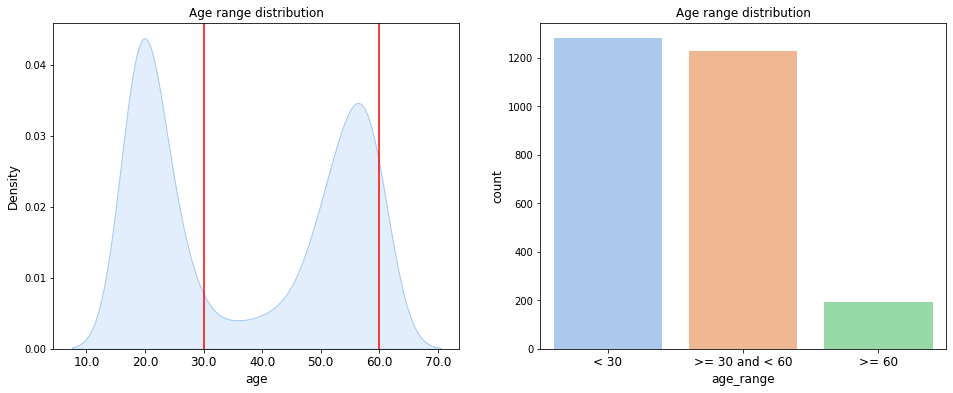

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

g1 = sns.kdeplot(data=train, x='age', fill=True, alpha=0.3, ax=ax[0])
ax[0].axvline(30, c='red')
ax[0].axvline(60, c='red')
g2 = sns.countplot(data=train, x='age_range', ax=ax[1], order=['< 30', '>= 30 and < 60', '>= 60'])

ax[0].set_xticklabels(g1.get_xticks(), fontsize=12)
ax[0].set_xlabel(g1.get_xlabel(), fontsize=12)
ax[0].set_ylabel(g1.get_ylabel(), fontsize=12)
ax[0].set_title('Age range distribution')

ax[1].set_xticklabels(g2.get_xticklabels(), fontsize=12)
ax[1].set_xlabel(g2.get_xlabel(), fontsize=12)
ax[1].set_ylabel(g2.get_ylabel(), fontsize=12)
ax[1].set_title('Age range distribution')
plt.show()



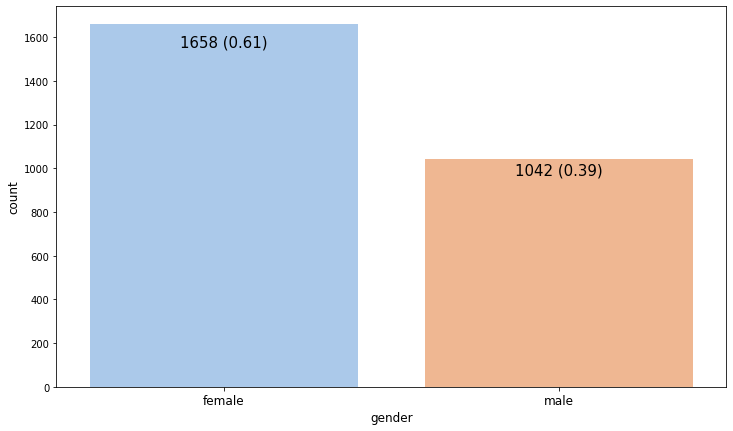

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

g = sns.countplot(data=train, x='gender', ax=ax)

for p in g.patches:
    g.annotate(f"{p.get_height()} ({(p.get_height()/len(train)):.2g})", (p.get_x()+p.get_width()/2., (p.get_height()+0.01)*0.95),
                  ha='center', va='center', fontsize=15)

ax.set_xticklabels(g.get_xticklabels(), fontsize=12)
ax.set_xlabel(g.get_xlabel(), fontsize=12)
ax.set_ylabel(g.get_ylabel(), fontsize=12) 
plt.show()

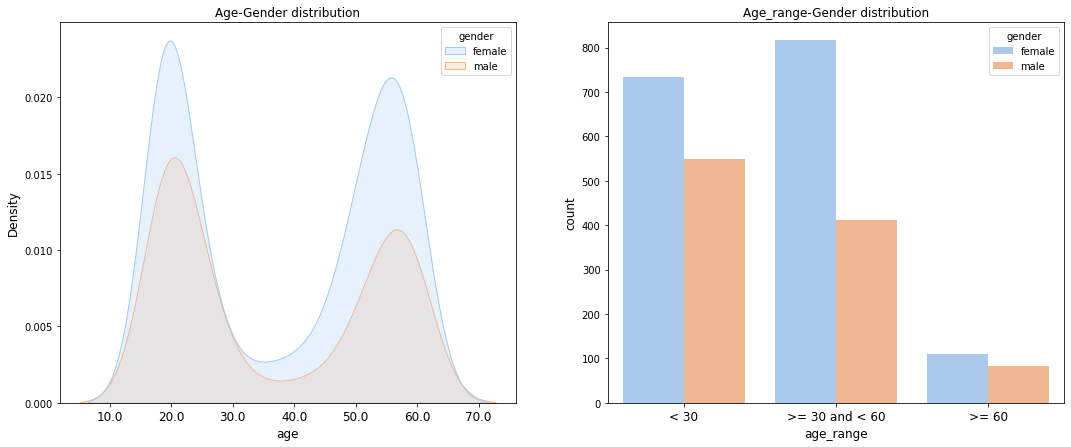

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

g1 = sns.kdeplot(data=train, x='age', hue='gender', fill=True, ax=ax[0])
g2 = sns.countplot(data=train, x='age_range', hue='gender', order=['< 30', '>= 30 and < 60', '>= 60'], ax=ax[1])

ax[0].set_xticklabels(g1.get_xticks(), fontsize=12)
ax[0].set_xlabel(g1.get_xlabel(), fontsize=12)
ax[0].set_ylabel(g1.get_ylabel(), fontsize=12)
ax[0].set_title('Age-Gender distribution')

ax[1].set_xticklabels(g2.get_xticklabels(), fontsize=12)
ax[1].set_xlabel(g2.get_xlabel(), fontsize=12)
ax[1].set_ylabel(g2.get_ylabel(), fontsize=12)
ax[1].set_title('Age_range-Gender distribution')

plt.show()

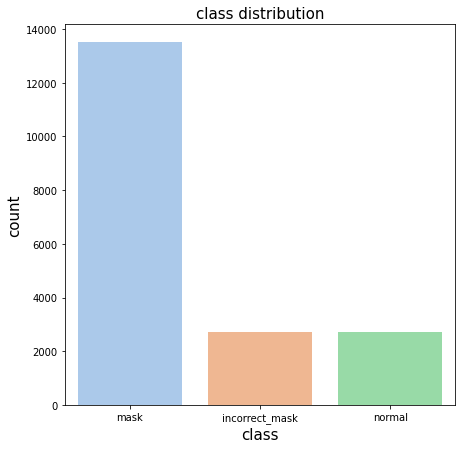

In [15]:
total = len(train) * 7
labels = ['mask', 'incorrect_mask', 'normal']
val = [(len(train)*5), (len(train)*1), (len(train)*1)]

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

g = sns.barplot(x=labels, y=val)

ax.set_xlabel('class' , fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('class distribution', fontsize=15)
plt.show()

In [16]:
# get sample train data
sample = train.sample()

In [17]:
sample_img_path = sample.path.values[0]
sample_img_list = [img for img in os.listdir(TRAIN_IMG_PATH+sample_img_path) if '._' not in img]
sample_img_list = sorted(sample_img_list)

In [19]:
ig = plt.figure(figsize=(18, 8))

for i, filename in enumerate(sample_img_list):
    img_path = TRAIN_IMG_PATH+'/'+sample_img_path+'/'+filename
    img = cv2.imread(img_path)
    ax = fig.add_subplot(2, 4, i+1)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    ax.set_title(filename.split('.')[0], fontsize=15)
    
plt.tight_layout()
plt.show()

<Figure size 1296x576 with 0 Axes>

In [20]:
sample = train.sample(5)
sample_img_path = sample.path.values
img_list = []

for img in sample_img_path:
    lists = []
    imgs = [img for img in os.listdir(TRAIN_IMG_PATH+img) if '._' not in img]
    
    for data in imgs:
        path = TRAIN_IMG_PATH+img+'/'+data
        img_kind = data.split('.')[0]
        lists.append(path)
    lists = sorted(lists)
    img_list.append(lists)

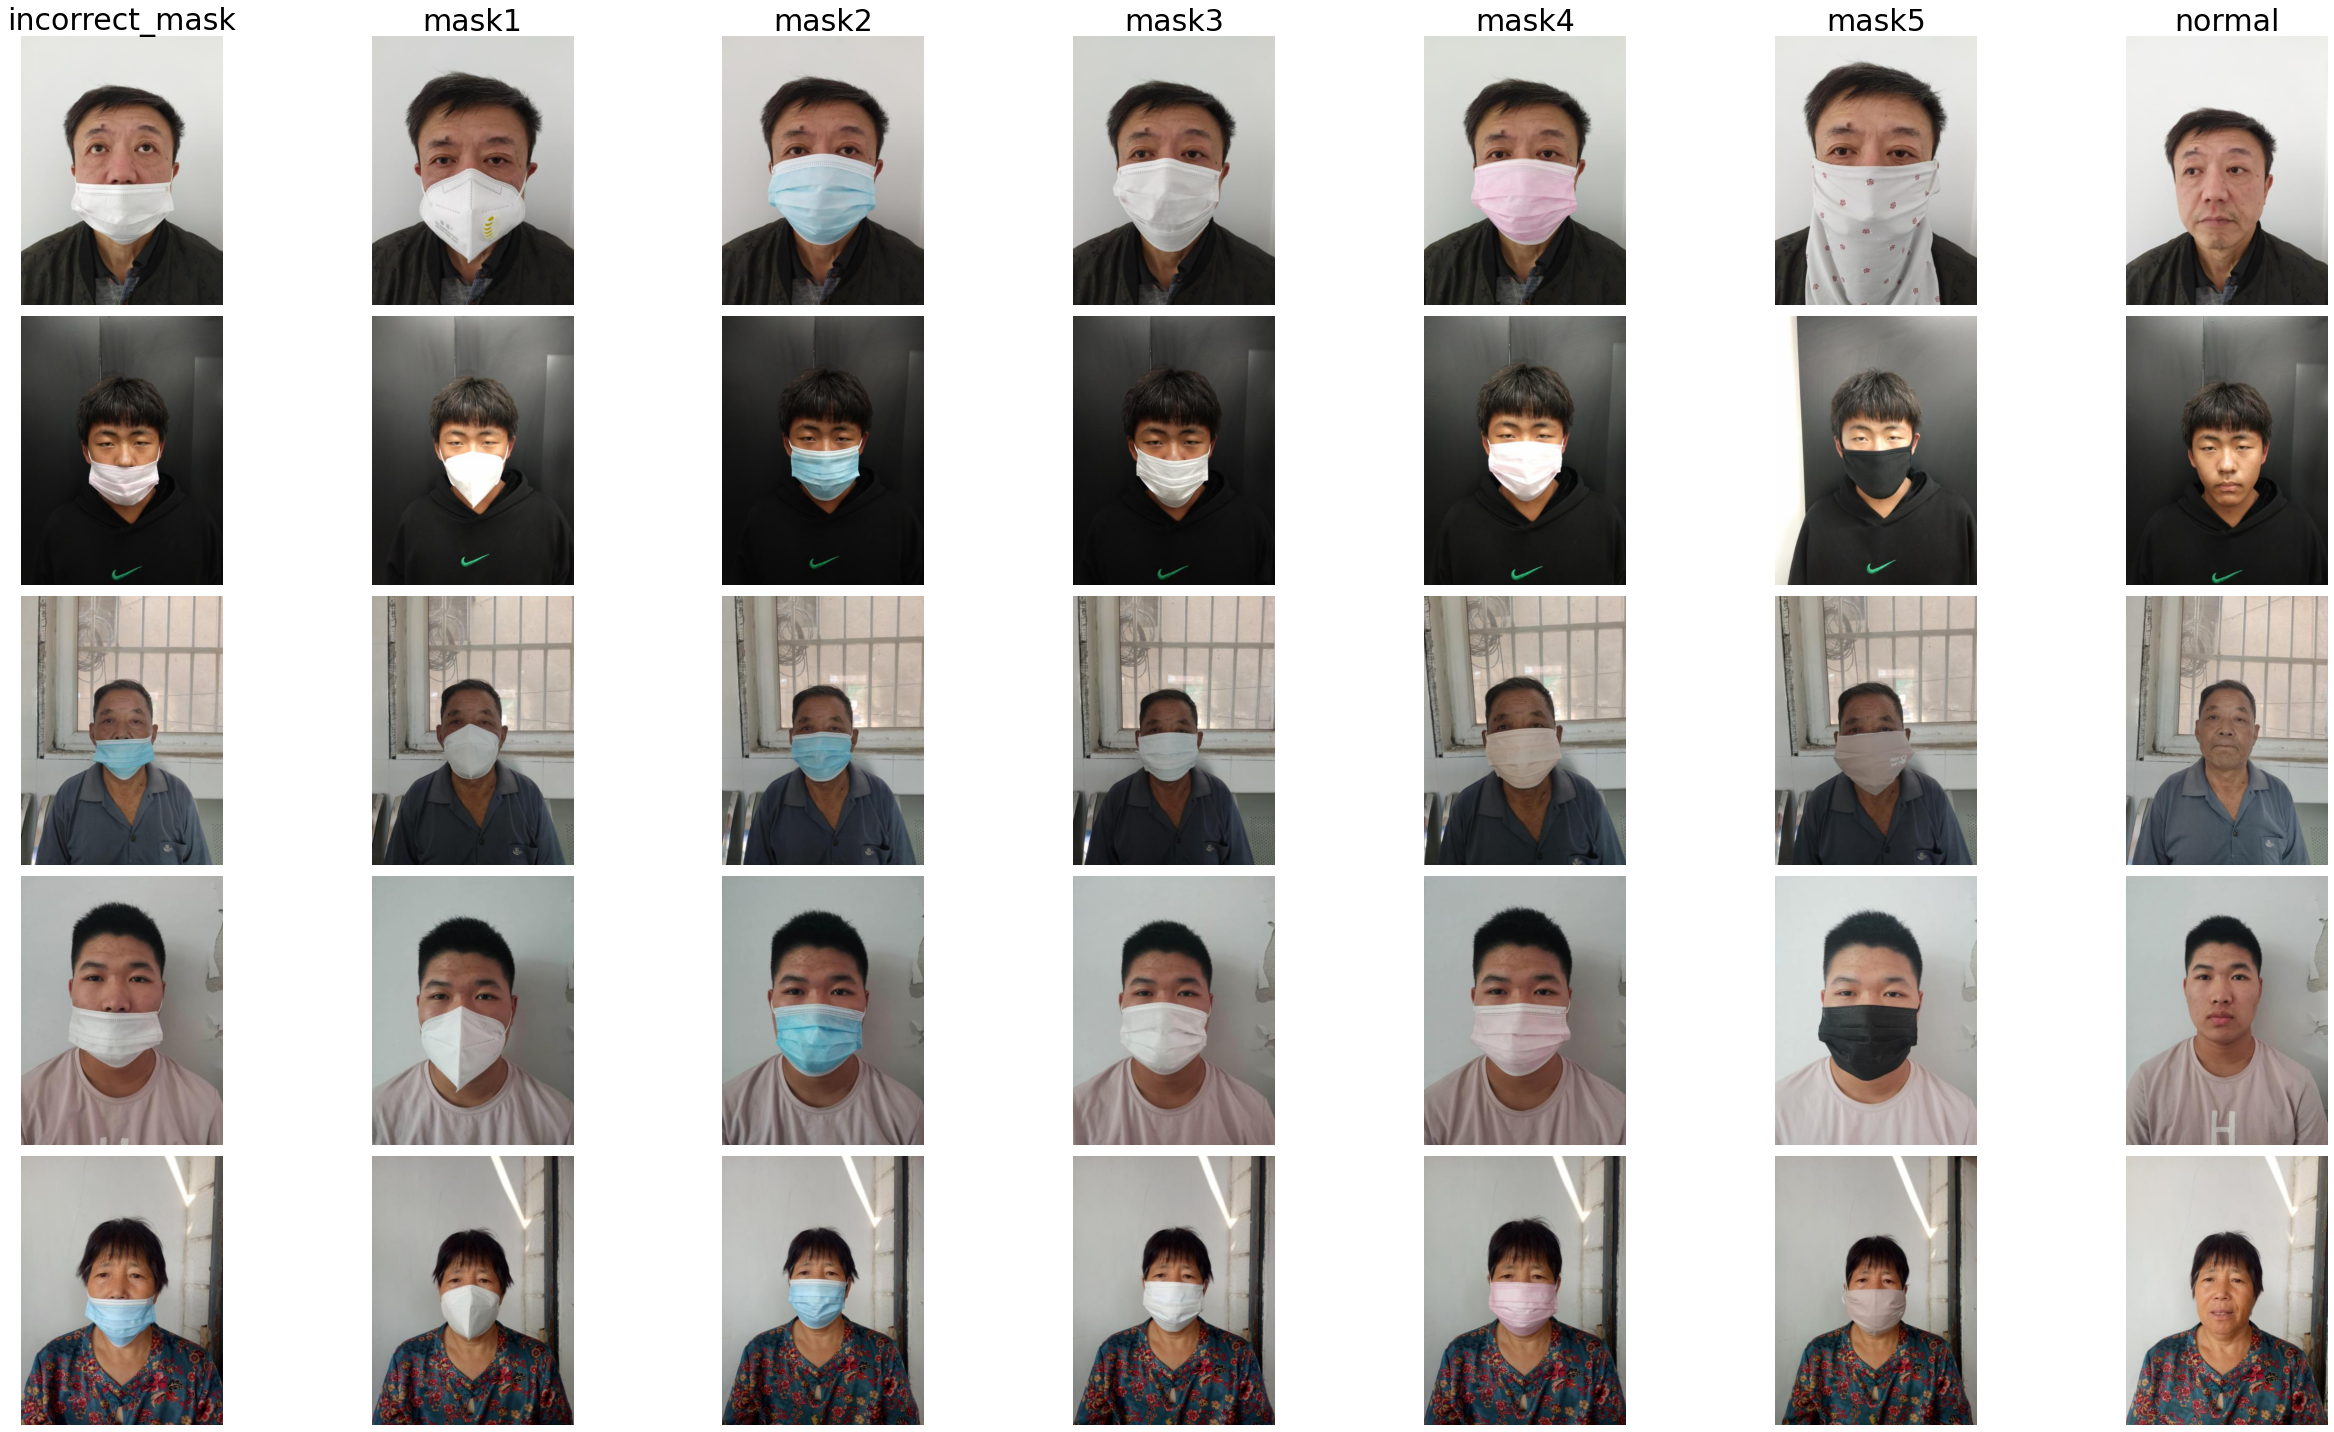

In [21]:
fig = plt.figure(figsize=(35, 20))

i=1

for files in img_list:
    for filename in files:
        img = cv2.imread(filename)
        ax = fig.add_subplot(5, 7, i)
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
        
        if i < 8:
            ax.set_title(filename.split('/')[-1].split('.')[0], fontsize=30)
        
        i += 1

plt.tight_layout()
plt.show()

In [9]:
result_image_df = pd.read_csv("../../output/result/output_53_44.csv")
value_counts = result_image_df['ans'].value_counts()
value_counts.sort_index()

0     1492
1     3057
2      818
3     2338
4      799
5     1249
6      348
7      370
9      172
10     374
12     434
13     531
14       3
15     293
16     322
Name: ans, dtype: int64

In [16]:
# from glob import glob
# import pandas as pd

# total_train_images = glob('/opt/ml/input/data/train/images/*/*') # 모든 train 이미지에 대한 경로를 리스트로 받아옵니다.

# def age_group(x): # 김준재님 코드 참고
#     return min(2, x // 30)

# def preprocess_train_dataframe(total_train_images):

#     new_train_df = pd.DataFrame(columns={"id", "gender", "race", "age", "mask", "img_path", "path"})
#     total_id, total_gender, total_race, total_age, total_img_path, total_mask, total_folder = [], [], [], [], [], [], []

#     for img_path in total_train_images:

#         split_list = img_path.split("/")
#         file_name = split_list[-1]
#         path = split_list[-2]

#         path_split = path.split("_")
#         id_ = path_split[0]
#         gender = 0 if path_split[1] == "male" else 1
#         race = path_split[2]
#         age = int(path_split[3])
        
#         if "normal" in file_name:
#             mask = 2
#         elif "incorrect" in file_name:
#             mask = 1
#         else:
#             mask = 0

#         total_id.append(id_)
#         total_gender.append(gender)
#         total_race.append(race)
#         total_age.append(age)
#         total_mask.append(mask)
#         total_img_path.append(img_path)
#         total_folder.append(path)   

#     new_train_df['id'] = total_id
#     new_train_df['gender'] = total_gender
#     new_train_df['race'] = total_race
#     new_train_df['age'] = total_age
#     new_train_df['mask'] = total_mask
#     new_train_df['img_path'] = total_img_path
#     new_train_df['path'] = total_folder
    
#     # age group 생성
#     new_train_df['age_group'] = new_train_df['age'].apply(lambda x : age_group(x))

#     # label 생성 - 신규범님 코드 참고
#     new_train_df['label'] = new_train_df['mask'] * 6 + new_train_df['gender']*3 + new_train_df['age_group']
#     return new_train_df.sort_values(by='id').reset_index(drop=True)


In [17]:
preprocess_train_dataframe(total_train_images)

,id,race,age,mask,img_path,path,gender,age_group,label
0,000001,Asian,45,1,/opt/ml/input/data/train/images/000001_female_...,000001_female_Asian_45,1,1,10
1,000001,Asian,45,1,/opt/ml/input/data/train/images/000001_female_...,000001_female_Asian_45,1,1,10
2,000001,Asian,45,2,/opt/ml/input/data/train/images/000001_female_...,000001_female_Asian_45,1,1,16
3,000001,Asian,45,2,/opt/ml/input/data/train/images/000001_female_...,000001_female_Asian_45,1,1,16
4,000001,Asian,45,1,/opt/ml/input/data/train/images/000001_female_...,000001_female_Asian_45,1,1,10
...,...,...,...,...,...,...,...,...,...
49540,006959,Asian,19,0,/opt/ml/input/data/train/images/006959_male_As...,006959_male_Asian_19,0,0,0
49541,006959,Asian,19,0,/opt/ml/input/data/train/images/006959_male_As...,006959_male_Asian_19,0,0,0
49542,006959,Asian,19,2,/opt/ml/input/data/train/images/006959_male_As...,006959_male_Asian_19,0,0,12
49543,006959,Asian,19,1,/opt/ml/input/data/train/images/006959_male_As...,006959_male_Asian_19,0,0,6
